<a href="https://colab.research.google.com/github/manojkumarshenu/almapro1/blob/main/End_to_End_toy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/almabetter 1/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df = df.iloc[ : , 1 : ]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


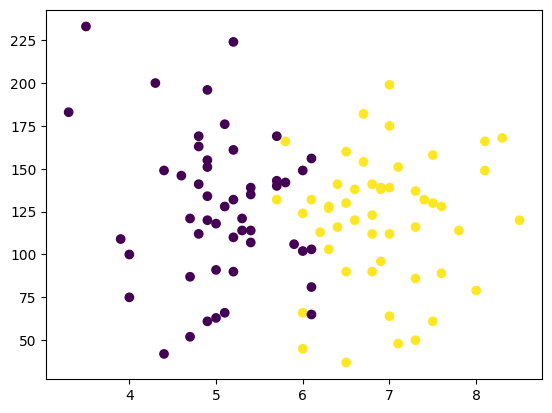

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])
plt.show()

In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [35]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [36]:
x_train = Scaler.fit_transform(x_train)
x_train

array([[ 1.14365616,  0.35749474],
       [-0.69280105,  0.23422069],
       [ 0.44405341,  0.92455535],
       [-1.04260243,  0.45611397],
       [-0.60535071, -0.03698221],
       [ 0.44405341, -0.8012813 ],
       [-0.08064865, -0.40680435],
       [-0.60535071, -0.20956588],
       [-0.25554934,  0.50542359],
       [ 0.88130513, -0.2588755 ],
       [ 1.40600719, -0.82593611],
       [ 0.88130513, -1.44230635],
       [ 0.6189541 ,  0.7766265 ],
       [ 0.00680169, -0.50542359],
       [-0.95515208,  0.28353031],
       [ 1.31855684,  0.18491107],
       [ 1.2311065 ,  0.23422069],
       [-2.17945689,  2.72435644],
       [-0.7802514 ,  0.13560145],
       [-1.3924038 ,  0.65335245],
       [ 0.00680169, -1.91074773],
       [-1.13005277, -0.03698221],
       [ 0.70640444,  0.0123274 ],
       [ 0.18170238, -0.23422069],
       [-1.3924038 , -1.98471215],
       [-0.95515208,  1.81212849],
       [-1.13005277, -0.87524573],
       [-0.86770174, -0.11094664],
       [ 1.75580856,

In [37]:
x_test = Scaler.transform(x_test)

In [38]:
x_test

array([[ 1.8432589 ,  0.65335245],
       [-0.69280105, -0.8012813 ],
       [-0.51790037,  0.40680435],
       [-0.7802514 , -1.39299673],
       [-0.95515208,  0.8012813 ],
       [ 0.00680169,  0.65335245],
       [-1.04260243,  0.99851978],
       [ 1.40600719,  0.13560145],
       [ 0.09425204,  0.82593611],
       [ 0.53150375,  0.38214955]])

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression()

In [41]:
clf.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred=clf.predict(x_test)

In [49]:
y_test

37    1
28    0
12    0
9     0
76    0
33    0
34    0
30    1
8     0
48    1
Name: placement, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

<Axes: >

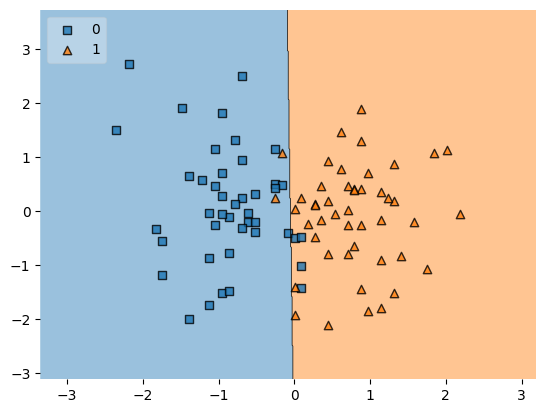

In [52]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [53]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))